# Legacy Photometry

* John Moustakas provided tables for the first 20 galaxies in the catalog.
* The tables are now on github in Virgo/tables directory
* This notebook shows how to read in the tables and plot SED

In [2]:
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
import os

In [3]:

homedir = os.getenv('HOME')
tabledir = homedir+'/github/Virgo/tables/'

In [9]:
ptab = Table.read(tabledir+'virgofilaments-phot.fits')

In [10]:
ptab

RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,MASKBITS,FITBITS,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_NUV,FLUX_FUV,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FLUX_IVAR_NUV,FLUX_IVAR_FUV,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],APFLUX_NUV [5],APFLUX_FUV [5],APFLUX_RESID_NUV [5],APFLUX_RESID_FUV [5],APFLUX_IVAR_NUV [5],APFLUX_IVAR_FUV [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,NEA_G,NEA_R,NEA_Z,BLOB_NEA_G,BLOB_NEA_R,BLOB_NEA_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR
int16,int32,bytes19,int32,bool,int16,int16,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
9009,-1,custom-110333p74323,44,True,4096,1536,REX,110.33359888204767,74.32327991456702,185541700000.0,146862080000.0,247.70467,241.86754,35591.08 .. 0.0,0.02598529,57904.21054205407,58499.01681488874,L3,1387024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Plot SED

In [33]:
def getSED(table,index):
    bands = ['G','R','Z','W1','W2','W3','W4','NUV','FUV']
    flux = []
    flux_err = []
    for b in bands:
        flux_key = 'FLUX_'+b
        ivar_key = 'FLUX_IVAR_'+b
        flux.append(table[flux_key][index])
        flux_err.append(1./np.sqrt(table[ivar_key][index]))
    return np.array(flux),np.array(flux_err)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Text(0.5, 1.0, 'Legacy+WISE+GALEX Photometry of First 20 Sources')

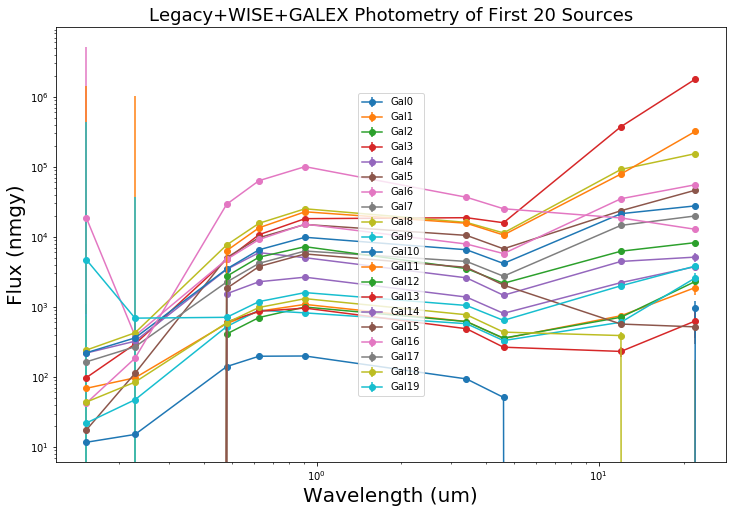

In [91]:
plt.figure(figsize=(12,8))
wavelengths = np.array([.480,.625,.910,3.4,4.6,12,22,.2271,.1528],'f')
sorted_indices = np.argsort(wavelengths)
# galex effective wavelengths from http://www.galex.caltech.edu/researcher/techdoc-ch1.html
for i in range(len(ptab)):
    flux,flux_err = getSED(ptab,i)
    

    #print(i,len(wavelengths),len(flux),len(flux_err))
    #print(flux_err)
    #try:
    #    plt.errorbar(wavelengths,flux,yerr=flux_err)
    #except:
    #plt.scatter(wavelengths,flux,s=10)
    plt.errorbar(wavelengths[sorted_indices],flux[sorted_indices],yerr=flux_err[sorted_indices],fmt='o-',label='Gal'+str(i))
    #plt.scatter(wavelengths,flux)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel('Wavelength (um)',fontsize=20)
plt.ylabel('Flux (nmgy)',fontsize=20)
plt.legend(loc='center')
plt.title('Legacy+WISE+GALEX Photometry of First 20 Sources',fontsize=18)

In [92]:
os.chdir(homedir+'/research/Virgo/legacy-phot')

In [93]:
# want to display legacy images with sed, and apphot


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


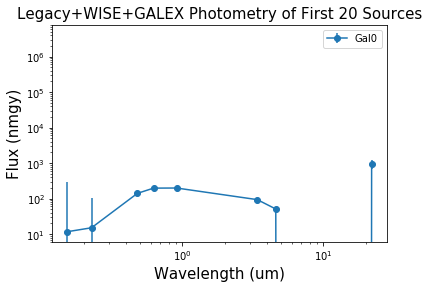

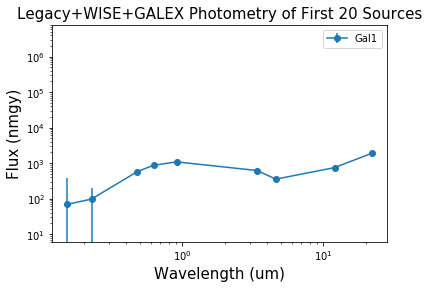

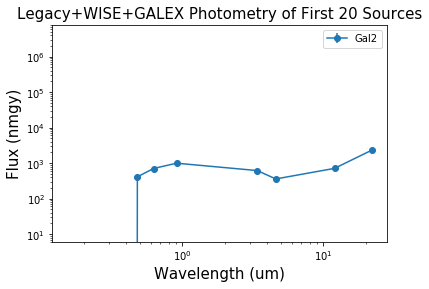

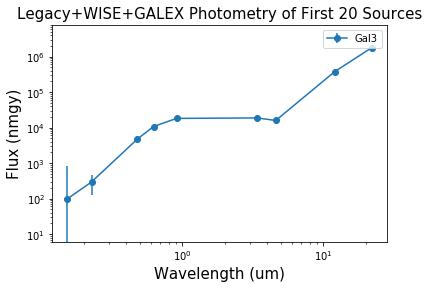

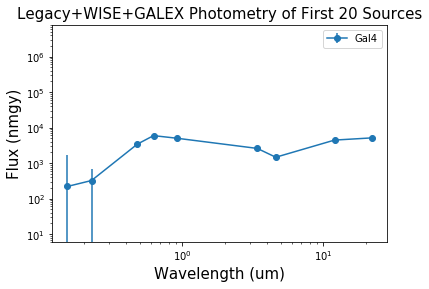

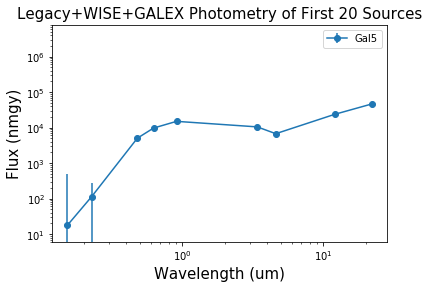

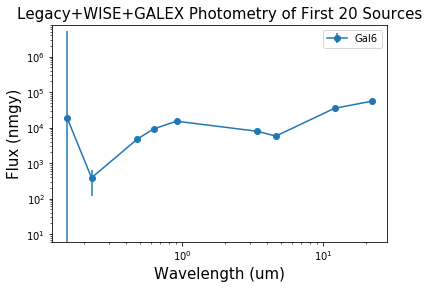

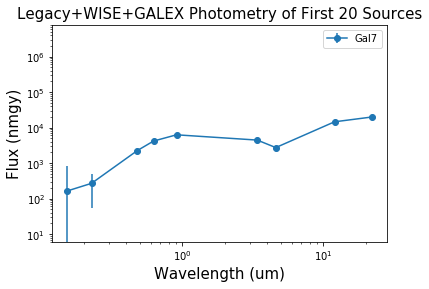

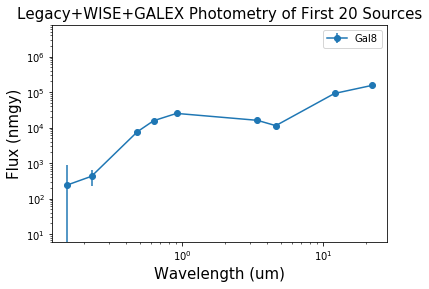

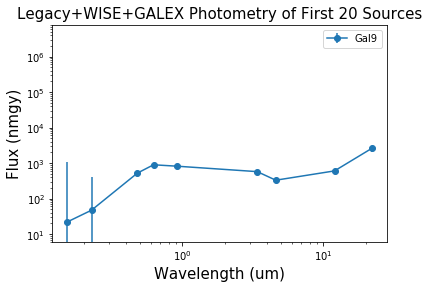

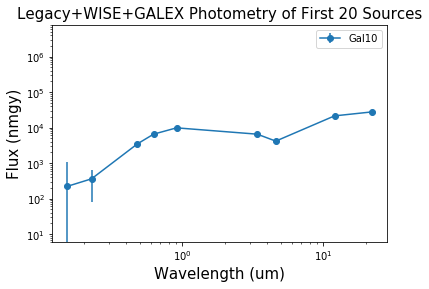

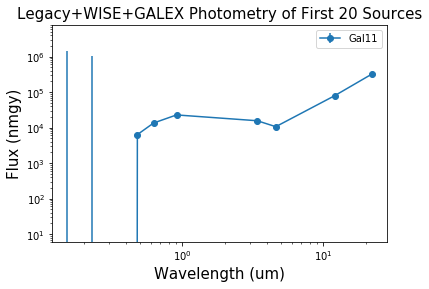

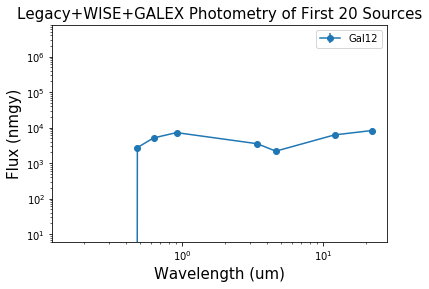

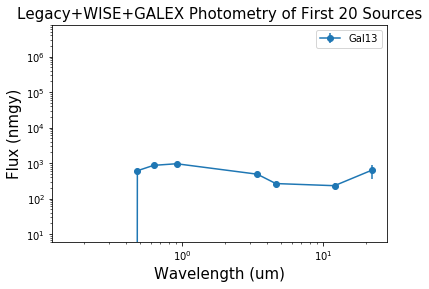

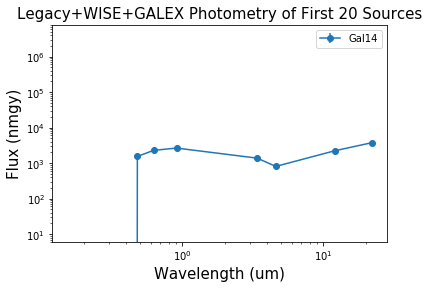

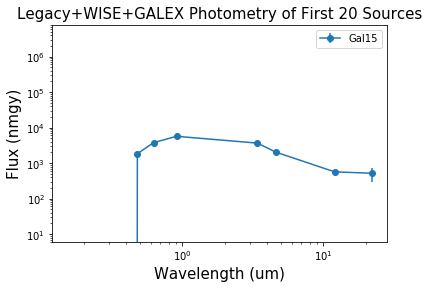

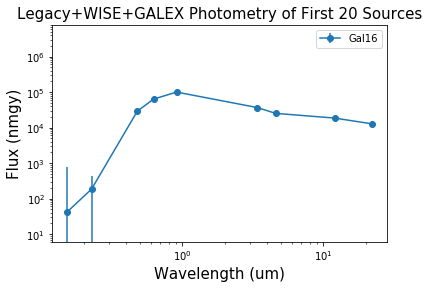

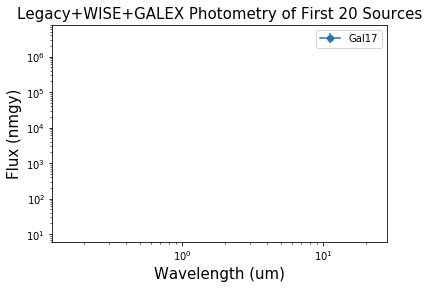

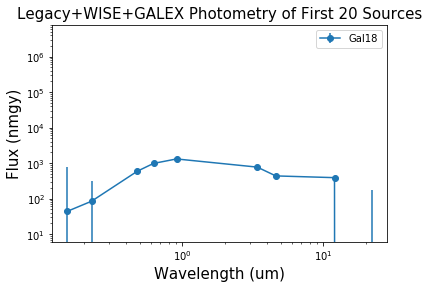

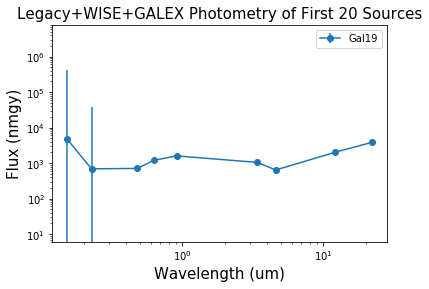

In [94]:
# plot SEDs individually

wavelengths = np.array([.480,.625,.910,3.4,4.6,12,22,.2271,.1528],'f')
sorted_indices = np.argsort(wavelengths)
# galex effective wavelengths from http://www.galex.caltech.edu/researcher/techdoc-ch1.html
for i in range(len(ptab)):
    plt.figure(figsize=(6,4))
    flux,flux_err = getSED(ptab,i)
    

    #print(i,len(wavelengths),len(flux),len(flux_err))
    #print(flux_err)
    #try:
    #    plt.errorbar(wavelengths,flux,yerr=flux_err)
    #except:
    #plt.scatter(wavelengths,flux,s=10)
    plt.errorbar(wavelengths[sorted_indices],flux[sorted_indices],yerr=flux_err[sorted_indices],fmt='o-',label='Gal'+str(i))
    #plt.scatter(wavelengths,flux)
    plt.gca().set_yscale('log')
    plt.gca().set_xscale('log')
    plt.xlabel('Wavelength (um)',fontsize=15)
    plt.ylabel('Flux (nmgy)',fontsize=15)
    plt.legend()
    plt.title('Legacy+WISE+GALEX Photometry of First 20 Sources',fontsize=15)
    plt.ylim(6,8e6)

# Flux Profiles

In [98]:
def plotapflux(table,index):
    bands = ['G','R','Z','W1','W2','W3','W4','NUV']#,'FUV']
    flux = []
    flux_err = []
    rad_grz = np.array([0.5, 0.75, 1.0, 1.5, 2.0, 3.5, 5.0, 7.0],'f')#arcsec
    rad_wise = rad_grz[3:]
    for b in bands:
        flux_key = 'APFLUX_'+b
        ivar_key = 'FLUX_IVAR_'+b
        flux = table[flux_key][index]
        flux_err = 1./np.sqrt(table[ivar_key][index])

        if (b.startswith('W') or b.startswith('NUV')):
            aps = rad_wise
        else:
            aps = rad_grz
        #print(len(flux),len(aps))
        #aps = aps*table[fwhm_key][i]
        plt.errorbar(aps,flux,yerr=flux_err,label=b,fmt='o-')
        plt.xlabel('Radius (arcsec)',fontsize=15)
        plt.ylabel('Flux (nmgy)',fontsize=15)
        

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  """


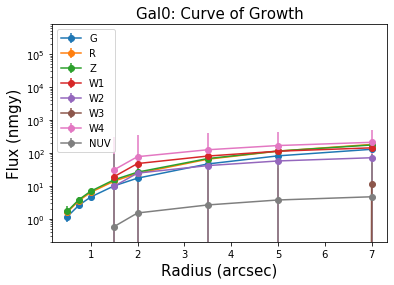

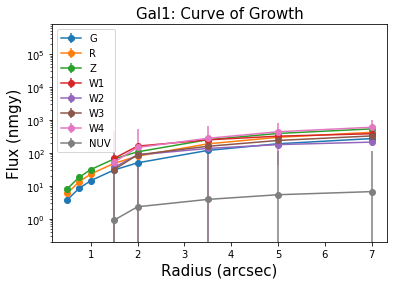

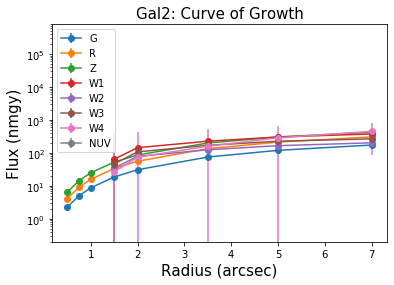

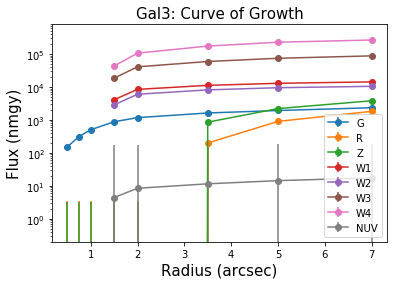

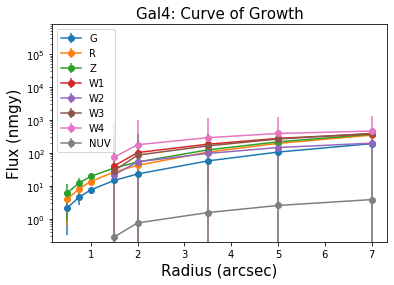

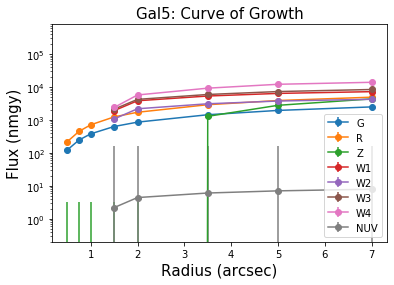

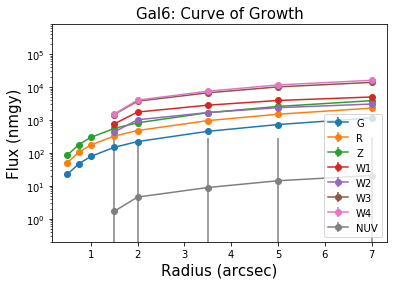

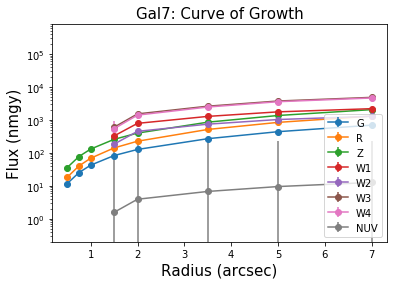

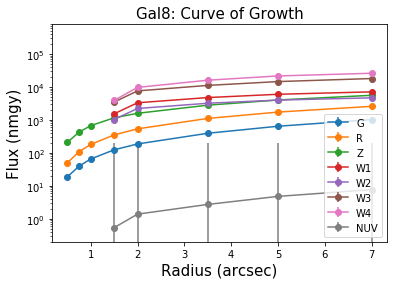

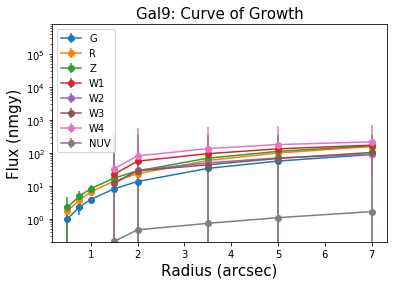

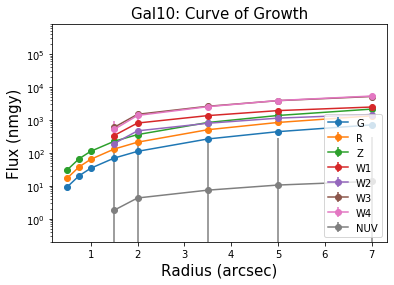

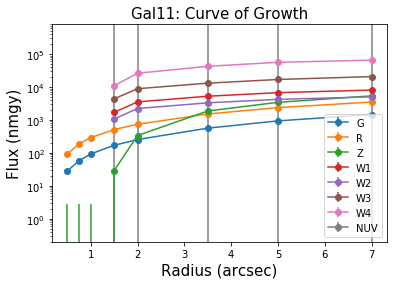

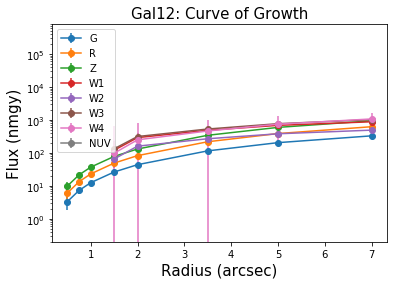

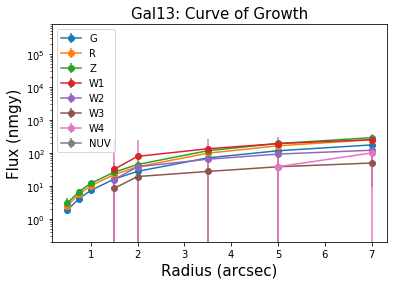

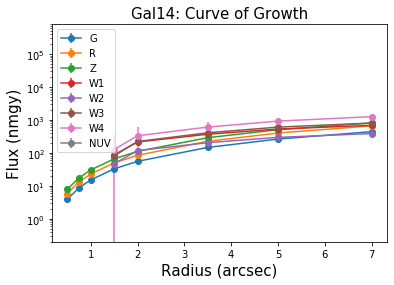

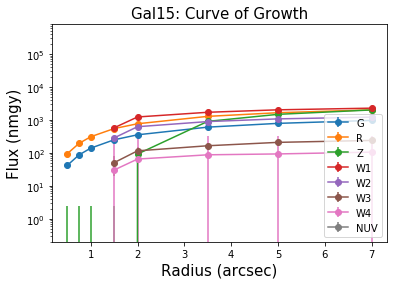

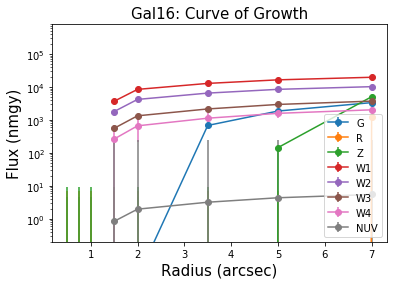

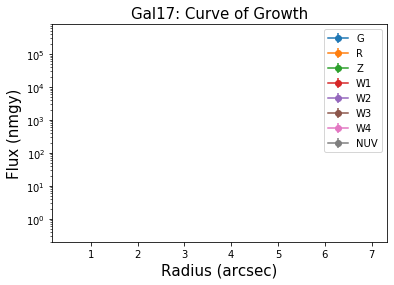

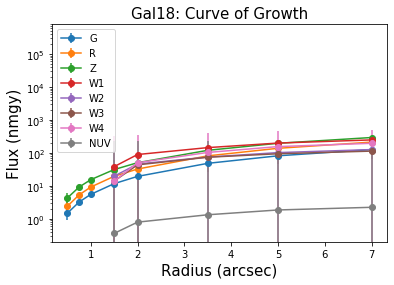

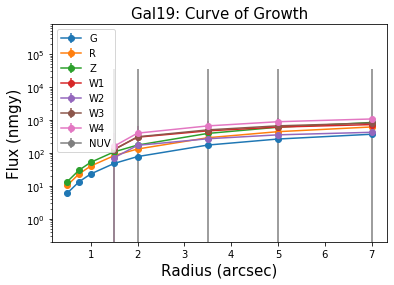

In [99]:
# plot curve of growth for all 20 galaxies
for index in range(20):
    plt.figure(figsize=(6,4))
    plotapflux(ptab,index)
    plt.gca().set_yscale('log')
    plt.ylim(.2,8.e5)
    plt.legend()
    plt.title('Gal'+str(index)+': Curve of Growth',fontsize=15)

# Merging N and S DR9 Catalogs

In [48]:
%run ~/github/Virgo/programs/make_legacy_cat.py

<Figure size 432x288 with 0 Axes>

In [49]:
legcat[~nflag]

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,FITBITS,SERSIC,SERSIC_IVAR,VFID
int16,int32,bytes8,int32,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,bytes8
9010,507277,1367p322,2628,SER,136.77617421739058,32.371961902778565,124740215000.0,562695400000.0,0.0 .. 0.0,0.021373186,103.514626,132.1588,153.99617,69.79351,45.450516,-43.871193,-59.35471,32.222443,9.31861,1.3148375,0.65643346,0.17240687,0.00030643778,7.1116533e-06,0.93869096,0.95827645,0.9764429,0.99638444,0.997778,0.99952567,0.9998209,5,4,4,194,188,14,15,1.5422753,1.3711828,1.1156923,2.1596065,0.7146805,0.65704477,0.13670276,0.0020630767,0.005560521,0.011649448,114.22922,113.589264,232.23799,541.5159,0.025244609,0.025474533,0.0247521,0.96300185,0.9349743,0.9395616,0,0,0,0,0,0,0,0,1.662815,1.5761017,1.1646832,1902.5205,570.2274,131.49872,1307.8312,372.46597,69.18017,4.295893,0.77957153,1376p318,8.581678,73759.9,-0.3874454,1127875.1,0.007006926,588659.9,2.1483436,2.742825,3.196038,2.1483436,2.742825,3.196038,L3,1113719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4096,528,1.0597953,64327.383,VFID2722
9010,507320,1494p322,4224,PSF,149.58782170333077,32.36992928787258,23716900000000.0,20645847000000.0,851458.44 .. 0.0,0.014815597,28.932615,101.49513,198.66464,2516.7458,1758.5171,11063.729,53750.633,95.34189,29.961548,13.92793,0.09532838,0.053727914,0.00079963094,1.0421657e-05,0.9570906,0.9708893,0.98361087,0.9974924,0.9984592,0.9996712,0.99987584,2,2,2,185,183,12,12,253.65002,482.77747,1020.32104,3821.932,812.4722,341.62772,6.215759,2.5179172,1.9676578,1.0398221,0.8197305,0.9399144,2.360612,1.4701973,0.0,0.0,0.0,0.666784,0.6667447,0.9999998,0,0,0,0,0,0,0,0,1.2685244,1.6243575,1.391882,877.4837,287.5832,40.501408,500.12207,190.72319,24.366203,4.5002284,0.8246561,1500p318,0.0,0.0,0.0,0.0,0.0,0.0,22.522846,79.00977,154.65222,46.738754,126.404945,239.61917,,0,0.

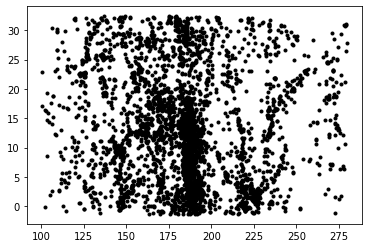

In [45]:
plt.figure()
flag = ~nflag
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'k.')

In [50]:
%run ~/github/Virgo/programs/readtables.py

/home/rfinn/github/Virgo/programs/readtables.py:120: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(self.dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtables.py:120: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(self.dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtables.py:121: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(self.dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtables.py:121: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(self.dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtables.py:122: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(self.dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtables.py:122: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(self.dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtables.py:124: RuntimeWarning: invalid value encountered in

In [51]:
v.dr9.colnames

['RELEASE',
 'BRICKID',
 'BRICKNAME',
 'OBJID',
 'TYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'DCHISQ',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'NOBS_W1',
 'NOBS_W2',
 'NOBS_W3',
 'NOBS_W4',
 'RCHISQ_G',
 'RCHISQ_R',
 'RCHISQ_Z',
 'RCHISQ_W1',
 'RCHISQ_W2',
 'RCHISQ_W3',
 'RCHISQ_W4',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACFLUX_W1',
 'FRACFLUX_W2',
 'FRACFLUX_W3',
 'FRACFLUX_W4',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'ANYMASK_G',
 'ANYMASK_R',
 'ANYMASK_Z',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_

In [39]:
gr = v.dr9['Mg']-v.dr9['Mr']

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


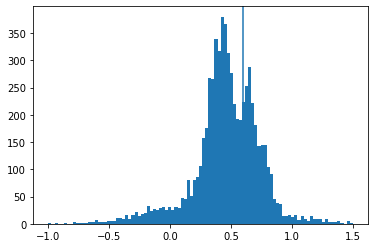

In [40]:
plt.figure()
mybins = np.linspace(-1,1.5,100)
t = plt.hist(gr,bins=mybins)
plt.axvline(x=0.6)

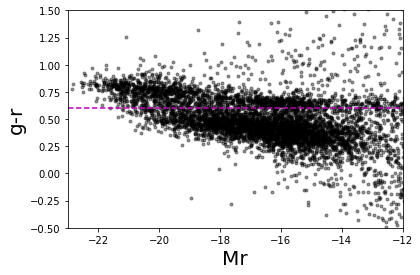

In [41]:
# color mag

plt.figure()
plt.plot(v.dr9['Mr'],gr,'k.',alpha=.4)
plt.ylim(-.5,1.5)
plt.xlim(-23,-12)
plt.ylabel('g-r',fontsize=20)
plt.xlabel("Mr",fontsize=20)
plt.axhline(y=0.6,ls='--',color='m')

# CREATING MAGPHYS INPUT FROM JOHN'S FILES

* john sent photometry file

```
I'm not certain who's taking the lead on the SED modeling, but can you
take the attached catalog for a test drive? There are three HDUs:

ELLIPSE - elliptical surface brightness profiles and aperture photometry
TRACTOR - Tractor catalog
PARENT - input / parent catalog

The data model for the ELLIPSE catalog should be (mostly?)
self-documenting, but you should try out the aperture photometry in
  FLUX_SB[23,24,25,26]_[FUV,NUV,G,R,Z,W1,W2,W3,W4]
  FLUX_IVAR_SB[23,24,25,26]_[FUV,NUV,G,R,Z,W1,W2,W3,W4]

and also (for fun) the total / integrated photometry based on fitting
the curve of growth in
  COG_MTOT_[FUV,NUV,G,R,Z,W1,W2,W3,W4]

but I do not have uncertainties for those (model-based) magnitudes just yet.

The fluxes and inverse variances, BTW, are in nanomaggies, and
negative fluxes should be fine to use since I'm also measuring the
inverse variance in the same aperture.

Let me know how this goes!

```

* I downloaded the file into ~/research/Virgo/legacy-phot/virgofilaments-legacyphot.fits

* magphys wants the fluxes in Jy, so I will need to convert from nanomaggies to Jy

  * star with flux of 1 maggie has AB mag of zero and flux density of 3631 Jy.
  https://www.sdss.org/dr15/help/glossary#M
  
```
nanomaggie
    A linear unit of flux density equal to 10-9 maggies. A star of brightness 1 nanomaggie has a magnitude of 22.5 in any band, or a flux density of 3.631 × 10-6 Jansky.
```

  * so I can multiply John's fluxes by 3631e-6 to convert to Jy
  
* input needed by magphys


In [59]:
from astropy.io import fits
from astropy.table import Table
import os
from astropy import units as u

In [253]:
os.chdir('/home/rfinn/research/Virgo/legacy-phot/')

In [245]:
photfile = '/home/rfinn/research/Virgo/legacy-phot/virgofilaments-legacyphot.fits'

In [246]:
ephot = Table.read(photfile,1)
tractor_phot = Table.read(photfile,2)
parent_phot = Table.read(photfile,3)

In [262]:
ephot['FLUX_SB25_W4']

9882.145
342.8846
56.314682
-503.71042
7247.18


In [269]:
flux_Jy

array([[ 7.74127991e+02,  9.11352173e+02,  6.51048889e+02,
         1.03421790e+03,  8.19075195e+02,  2.20312695e+03,
         6.26539673e+02,  4.78253223e+03,  9.88214453e+03],
       [ 3.63424339e+01,  7.40879364e+01,  2.74800720e+01,
         3.64816704e+01,  3.26142464e+01,  2.47823044e+02,
         1.35681702e+02, -1.79130661e+02,  3.42884613e+02],
       [ 0.00000000e+00,  0.00000000e+00,  8.85404706e-01,
         1.33178627e+00,  1.37249041e+00,  4.86309090e+01,
         2.79777317e+01, -1.93438950e+01,  5.63146820e+01],
       [ 5.80207367e+01,  6.55008087e+01,  7.41126404e+01,
         9.19068680e+01,  1.07119286e+02,  1.73625977e+02,
         9.33223877e+01,  1.07296921e+02, -5.03710419e+02],
       [ 3.46316589e+02,  4.02546204e+02,  5.41343994e+02,
         6.49358643e+02,  7.59132629e+02,  1.26877661e+03,
         7.12594727e+02,  2.08919458e+03,  7.24718018e+03]])

In [271]:
fluxes

['FLUX_SB25_FUV',
 'FLUX_SB25_NUV',
 'FLUX_SB25_G',
 'FLUX_SB25_R',
 'FLUX_SB25_Z',
 'FLUX_SB25_W1',
 'FLUX_SB25_W2',
 'FLUX_SB25_W3',
 'FLUX_SB25_W4']

In [265]:
ephot['FLUX_SB25_W4']

9882.145
342.8846
56.314682
-503.71042
7247.18


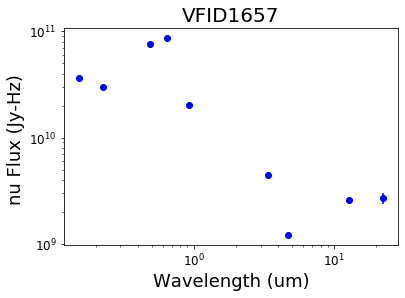

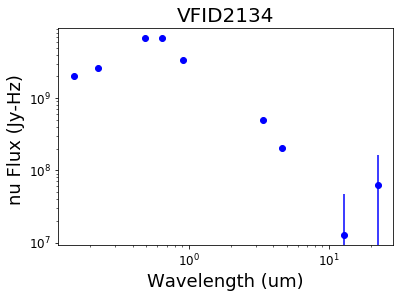

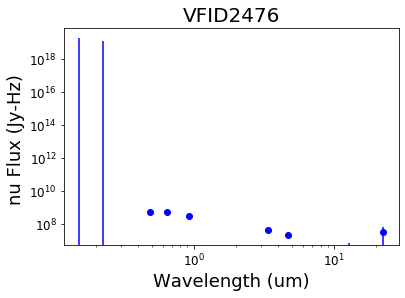

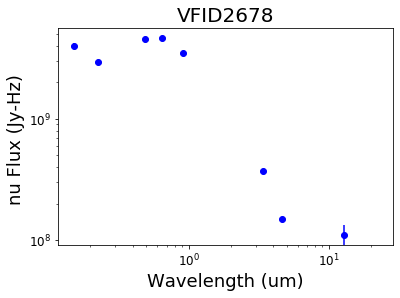

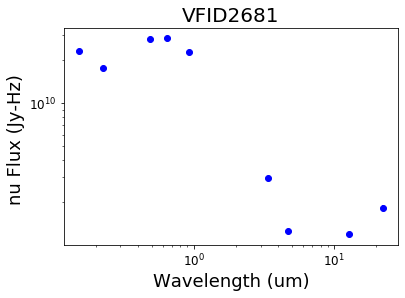

In [503]:
# using sb of 22 mag/sq arcsec
%run ~/github/Virgo/programs/sedFunctions.py
%run ~/github/Virgo/programs/legacy2magphys.py --sbmag 25
plotallsed(all_effective_wavelengths,flux_Jy,err_Jy,titles=ephot['VF_ID'])

In [129]:
!cp ~/software/magphys/*.sed .
!cp ~/software/magphys/*.fit .

In [130]:
!ls

1657.fit	   magphysInput.dat	   old-tables
1657.sed	   magphysInput-gal1.dat   virgofilaments-legacyphot.fits
legacyFilters.dat  magphysInput-gal1.dat~


In [219]:
effective_wavelengths = np.array(all_effective_wavelengths,'f')

In [220]:
effective_wavelengths

array([ 0.1516 ,  0.2267 ,  0.48623,  0.64606,  0.91993,  3.40025,
        4.65201, 12.81034, 22.37528], dtype=float32)

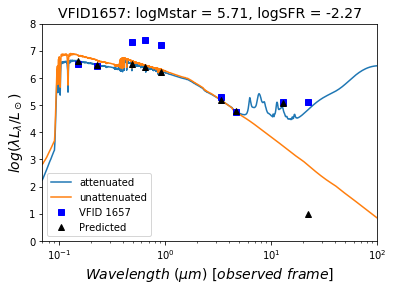

In [244]:
effective_wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
%run ~/github/Virgo/programs/sedFunctions.py
s = magphys_sed('1657',all_effective_wavelengths)
s.plot_sed()

# Convert John's photometry to magphys input

* The code

ValueError: operands could not be broadcast together with shapes (5,9) (5,) 

/home/rfinn/github/Virgo/programs/sedFunctions.py:27: RuntimeWarning: invalid value encountered in log10
  flux = 22.5 - 2.5*np.log10(flux/3.631e-6) # convert from Jy to nanomaggy, then to AB mag
/home/rfinn/github/Virgo/programs/sedFunctions.py:27: RuntimeWarning: divide by zero encountered in log10
  flux = 22.5 - 2.5*np.log10(flux/3.631e-6) # convert from Jy to nanomaggy, then to AB mag
/home/rfinn/github/Virgo/programs/sedFunctions.py:27: RuntimeWarning: invalid value encountered in log10
  flux = 22.5 - 2.5*np.log10(flux/3.631e-6) # convert from Jy to nanomaggy, then to AB mag
/home/rfinn/github/Virgo/programs/sedFunctions.py:27: RuntimeWarning: invalid value encountered in log10
  flux = 22.5 - 2.5*np.log10(flux/3.631e-6) # convert from Jy to nanomaggy, then to AB mag


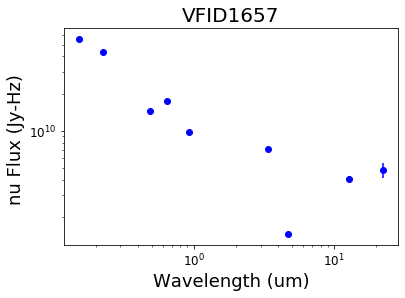

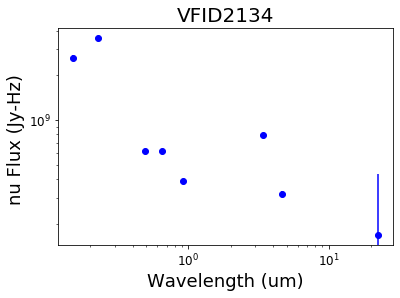

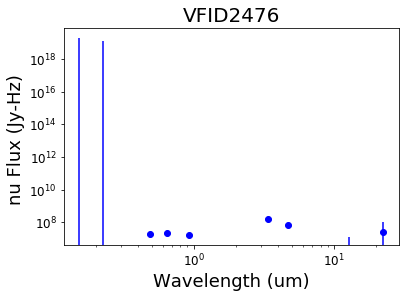

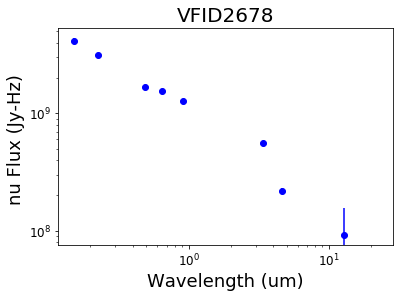

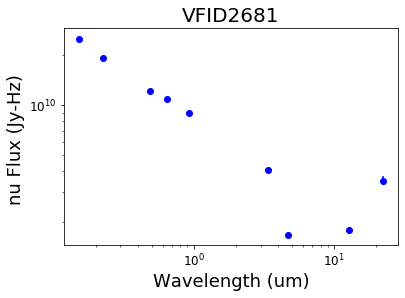

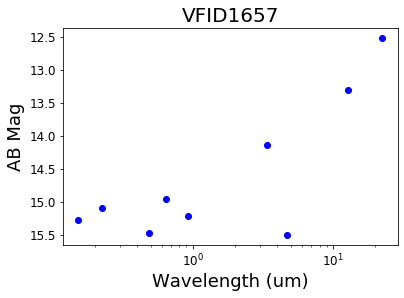

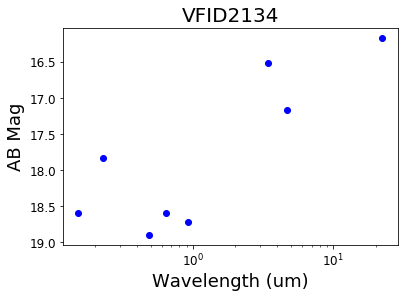

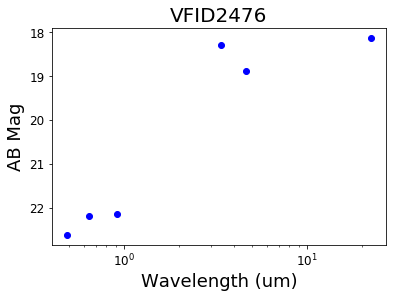

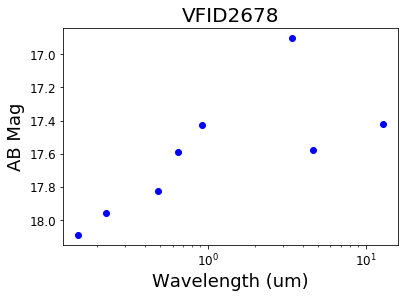

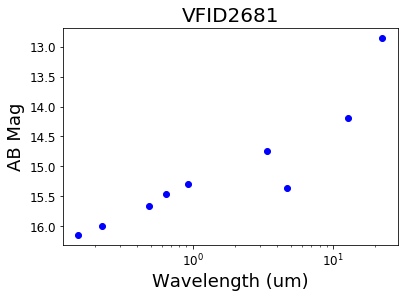

In [493]:
# using sb of 26 mag/sq arcsec
os.chdir('/home/rfinn/research/Virgo/legacy-phot/')
%run ~/github/Virgo/programs/sedFunctions.py
%run ~/github/Virgo/programs/legacy2magphys.py --sbmag 25
plotallsed(all_effective_wavelengths,flux_Jy,err_Jy,titles=ephot['VF_ID'])
plotallsed(all_effective_wavelengths,flux_Jy,err_Jy,titles=ephot['VF_ID'],ABmag=True)

In [274]:
#os.chdir('/home/rfinn/software/magphys/')
os.environ["USER_OBS"] = '/home/rfinn/research/Virgo/legacy-phot/magphysInput.dat'
os.environ["USER_FILTERS"] = '/home/rfinn/research/Virgo/legacy-phot/legacyFilters.dat'

# Run magphys in terminal window

```
chdir /home/rfinn/software/magphys/

./make_zgrid # answering no for now - will have to modify this to make a grid eventually

source get_libs # this takes a while

source fit_sample
```


When finished, I copy the *.fit and *.sed files back into the legacy-phot directory

In [504]:
os.chdir('/home/rfinn/research/Virgo/legacy-phot/')
!cp /home/rfinn/software/magphys/*.fit .
!cp /home/rfinn/software/magphys/*.sed .

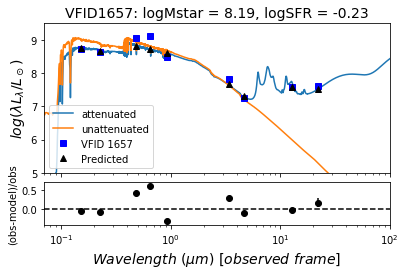

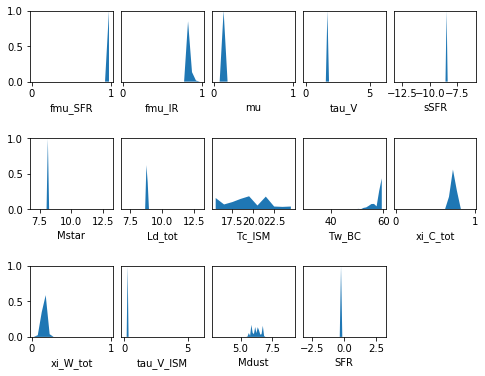

In [523]:
effective_wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
%run ~/github/Virgo/programs/sedFunctions.py
s = magphys_sed('1657',all_effective_wavelengths)
s.plot_sed()
s.plot_histograms()

/home/rfinn/github/Virgo/programs/sedFunctions.py:135: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)


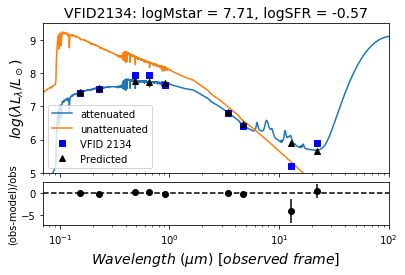

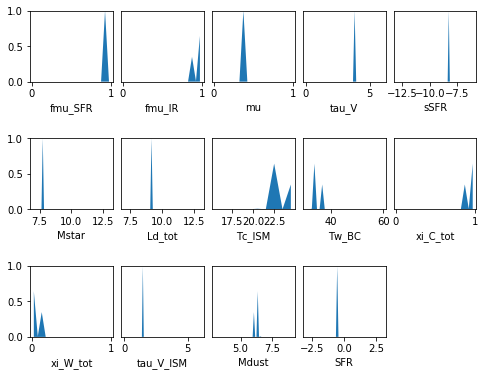

In [524]:
effective_wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
%run ~/github/Virgo/programs/sedFunctions.py
s = magphys_sed('2134',all_effective_wavelengths)
s.plot_sed()
s.plot_histograms()

/home/rfinn/github/Virgo/programs/sedFunctions.py:133: RuntimeWarning: divide by zero encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/Virgo/programs/sedFunctions.py:133: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/Virgo/programs/sedFunctions.py:135: RuntimeWarning: divide by zero encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/Virgo/programs/sedFunctions.py:135: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/Virgo/programs/sedFunctions.py:136: RuntimeWarning: divide by zero encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)
/home/rfinn/github/Virgo/programs/sedFunctions.

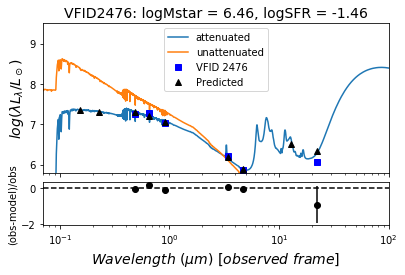

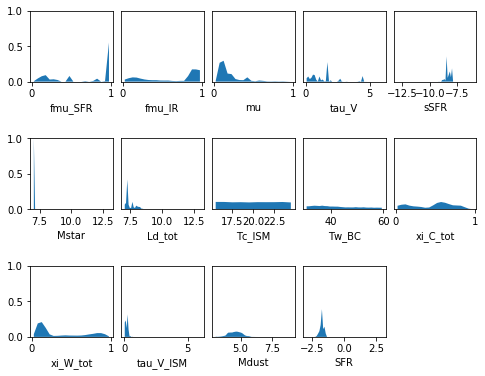

In [532]:
effective_wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
%run ~/github/Virgo/programs/sedFunctions.py
s = magphys_sed('2476',all_effective_wavelengths)
s.plot_sed()
s.plot_histograms()

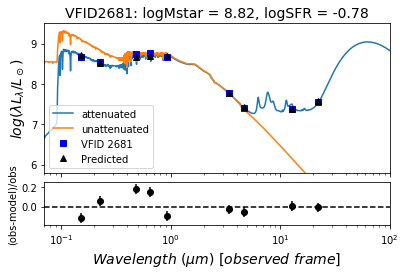

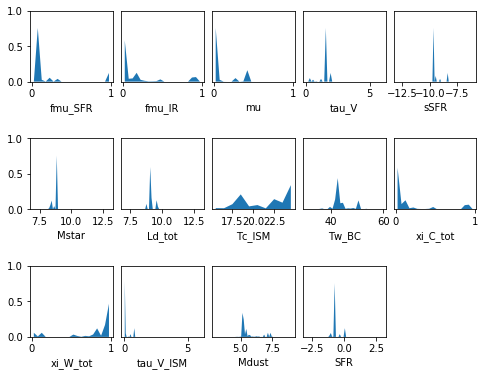

In [533]:
effective_wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
%run ~/github/Virgo/programs/sedFunctions.py
s = magphys_sed('2681',all_effective_wavelengths)
s.plot_sed()
s.plot_histograms()

/home/rfinn/github/Virgo/programs/sedFunctions.py:133: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/Virgo/programs/sedFunctions.py:135: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/Virgo/programs/sedFunctions.py:136: RuntimeWarning: invalid value encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)


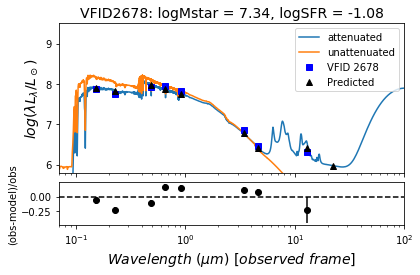

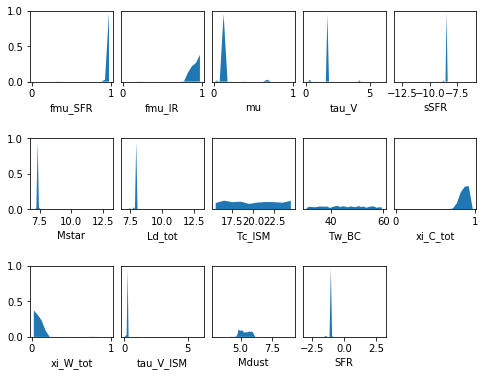

In [534]:
effective_wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
%run ~/github/Virgo/programs/sedFunctions.py
s = magphys_sed('2678',all_effective_wavelengths)
s.plot_sed()
s.plot_histograms()

# Sanity Check on Stellar Masses

Taking first galaxy as an example.

The surface brightness in nanomaggies is

In [488]:
%run ~/github/Virgo/programs/legacy2magphys.py --sbmag 25
print('sb in R25 = {:.2f}'.format(ephot['FLUX_SB25_R'][0]))
print('AB mag in R25 = {:.2f}'.format(22.5-2.5*np.log10(ephot['FLUX_SB25_R'][0])))
print('total mag from COV = {:.2f}'.format(ephot['COG_MTOT_R'][0]))

sb in R25 = 1034.22
AB mag in R25 = 14.96
total mag from COV = 11.95


In [480]:
cog_mtot[:,3]

array([11.94525909, 15.39596176, 16.13024712, 16.24735451, 14.11645317])

In [475]:
ephot['COG_MTOT_R']

11.945259
15.395962
16.130247
16.247355
14.116453


In [489]:
rmag_tot

11.945259
15.395962
16.130247
16.247355
14.116453


In [491]:
flux_tot_Jy

0.060523275
0.0025213982
0.0012821162
0.0011510239
0.00819304


In [492]:
scale_factor

16.116997232565268
19.03445596919319
265.1347097928389
3.449134508717705
3.4748352509414406


In [497]:
flux_Jy*scale_factor.T

ValueError: operands could not be broadcast together with shapes (5,9) (5,) 

In [499]:
scaled_flux_Jy = np.zeros(flux_Jy.shape,'d')
scaled_err_Jy = np.zeros(flux_Jy.shape,'d')
for i in range(len(scale_factor)):
    scaled_flux_Jy[i] = flux_Jy[i]*scale_factor[i]
    scaled_err_Jy[i] = err_Jy[i]*scale_factor[i]

In [500]:
scaled_flux_Jy

array([[ 0.0453026 ,  0.05333307,  0.03809991,  0.06052328,  0.04793295,
         0.12892879,  0.03666561,  0.27987771,  0.57831117],
       [ 0.00251177,  0.00512052,  0.00189926,  0.0025214 ,  0.0022541 ,
         0.01712807,  0.00937752, -0.01238046,  0.02369816],
       [ 0.        ,  0.        ,  0.00085238,  0.00128212,  0.0013213 ,
         0.04681718,  0.02693428, -0.01862245,  0.05421438],
       [ 0.00072664,  0.00082032,  0.00092817,  0.00115102,  0.00134154,
         0.00217446,  0.00116875,  0.00134377, -0.00630837],
       [ 0.00436952,  0.00507898,  0.00683021,  0.00819304,  0.00957807,
         0.01600831,  0.0089909 ,  0.02635963,  0.09143859]])

In [501]:
flux_Jy

array([[ 2.81085866e-03,  3.30911973e-03,  2.36395863e-03,
         3.75524512e-03,  2.97406199e-03,  7.99955428e-03,
         2.27496563e-03,  1.73653755e-02,  3.58820669e-02],
       [ 1.31959372e-04,  2.69013311e-04,  9.97801399e-05,
         1.32464949e-04,  1.18422329e-04,  8.99845501e-04,
         4.92660271e-04, -6.50423463e-04,  1.24501402e-03],
       [ 0.00000000e+00,  0.00000000e+00,  3.21490461e-06,
         4.83571603e-06,  4.98351255e-06,  1.76578833e-04,
         1.01587146e-04, -7.02376856e-05,  2.04478609e-04],
       [ 2.10673301e-04,  2.37833432e-04,  2.69103009e-04,
         3.33713833e-04,  3.88950139e-04,  6.30435941e-04,
         3.38853599e-04,  3.89595109e-04, -1.82897260e-03],
       [ 1.25747558e-03,  1.46164524e-03,  1.96562009e-03,
         2.35782121e-03,  2.75641051e-03,  4.60692775e-03,
         2.58743158e-03,  7.58586545e-03,  2.63145119e-02]])

In [502]:
scale_factor

16.116997232565268
19.03445596919319
265.1347097928389
3.449134508717705
3.4748352509414406


# Computational Time

* magphys takes about 4 minutes to run on each galaxy.

* this is equivalent to almost 20 days of computational time!

In [529]:
4*7000/60/24

19.444444444444446

# Updating with new filters

* we have the updated filter files that include the legacy filters

* need to recompile magphys

* then rerun test sample of 5 galaxies with new filter set to make sure everything is ok



# Updating with sample of 200 galaxies

* now that we have filter set in place, we need to be careful if galaxy is in N or S of legacy

In [27]:
os.chdir('/home/rfinn/research/Virgo/legacy-phot/')
%run ~/github/Virgo/programs/legacy2magphys.py --sbmag 25

In [26]:
out_table

VF_ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
309,0.010364,0.001084917295761906,3.445733843434049e-05,0.001427535445498974,2.3749250891439554e-05,0.0061529806185542145,4.171231093164003e-06,0.008808380924165249,5.706991146046251e-06,0.0061669282155600805,1.750664403774186e-05,0.004254951174119859,9.346082447683602e-06,0.002117901745945337,1.6279183867433937e-05,0.005356827404328575,0.00014833568935882624,0.01301912306350139,0.0007484916990370897
386,0.009971,0.0,1605409.385498888,0.0,1605409.385498888,0.00023882080860306276,6.527703754349864e-07,0.00037153338780626655,1.200998422246615e-06,0.0004804552634204807,2.495941320053526e-06,0.00012609221249475686,1.537453792480947e-06,6.915813227596303e-05,2.6605842037124406e-06,6.278257951404276e-05,3.04453157485772e-05,8.696285832728918e-05,0.0001877019838647499
473,0.010324,0.00024393249243152967,1.7531197525914135e-05,0.00033767642573839557,3.1340816585506938e-06,0.002171488416679297,1.9249647231189156e-06,0.003302829572930932,3.9576356228548475e-06,0.003371745263209417,8.996448211521846e-06,0.0020661771435470633,6.159087227510841e-06,0.0011828274586938626,9.938282129300894e-06,0.001981851070330698,9.06640456676627e-05,0.0034669370944160794,0.0004603813459213196
481,0.010186666666666667,4.468226759539251,0.2503718997410686,40.91451350597884,0.12376562910866556,5225.438538728605,0.9345538507901946,9120.65234375,1.4724897714851681,10806.122527559164,3.6434482443679115,6581.169218760626,3.1528974127640588,3464.405899053401,4.049336907599276,1552.985291218559,27.31565478697809,1595.3364350200532,138.86668363506047
483,0.009906666666666666,0.000656084863646186,3.400939252871948e-06,0.001221742945659497,1.6137145571287345e-06,0.013849830031289336,6.25017612677213e-06,0.02518472447991371,1.2829296288079885e-05,0.027300127927427333,3.877597373828299e-05,0.024013210630278923,1.9338290020112194e-05,0.016928288256846256,3.1968823383522554e-05,0.13749097624782425,0.0002767829247076706,0.4824722666507317,0.001406580553833665
531,0.004214666666666667,0.00019768381452126823,1.740139758754056e-05,0.00022880518798598694,1.2828308626363635e-05,0.001364845950260884,2.771210568512501e-06,0.0020532491616904736,4.51325400996437e-06,0.0015183328987751308,8.496297778808e-06,0.001109797747034494,6.928054804196875e-06,0.000576174762675104,1.3332872296625291e-05,0.0009725171514020474,0.00018384270151870023,0.0015487232766196709,0.0009155024216816112
549,0.009773333333333334,0.00033912330805958846,1.7556222279709314e-05,0.0003992935905189201,1.1272185457184811e-05,0.0013278698841355536,1.9347796488428075e-06,0.0016567662823945284,2.5310829515873706e-06,0.0017280039850932785,5.099104780836096e-06,0.0007883326710447462,3.7275669866579286e-06,0.0004789620921216045,6.166893918695681e-06,0.0012269425109247586,6.8876665752185e-05,0.003704283799380907,0.0003501417802462454
569,0.009592666666666668,0.0016026043698401946,1.9568074320334666e-05,0.0027323426942400873,1.0856249006073662e-05,0.017806161536640625,8.67430526908807e-06,0.02940810658037663,1.06891132627251e-05,0.03945304255437107,1.6094001951311964e-05,0.02441771685952659,2.3636040142118266e-05,0.014886155231867988,3.132233148758949e-05,0.08193174522951528,0.00026596414943015243,0.1048804349508968,0.0013391045645498518
757,0.004183,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0,0.0,1000000.0


In [24]:
ephot.colnames

['VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',
 'SMA_IVAR_SB25.5',
 'SMA_IVAR_SB26',
 'FLUX_SB22_G',
 'FLUX_SB22.5_G',
 'FLUX_SB23_G',
 'FLUX_SB23.5_G',
 'FLUX_SB24_G',
 'FLUX_SB24.5_G',
 'FLUX_SB25_G',
 'FLUX_SB25.5_G',
 'FLUX_SB26_G',
 'FLUX_IVAR_SB22_G',
 'FLUX_IVAR_SB22.5_G',
 'FLUX_IVAR_SB23_G',
 'FLUX_IVAR_SB23.5_G',
 'FLUX_IVAR_SB24_G',
 'FLUX_IVAR_SB24.5_G',
 'FLUX_IVAR_SB25_G',
 'FLUX_IVAR_SB25.5_G',
 'FLUX_IVAR_SB26_G',
 'FLUX_SB22_R',
 'FLUX_SB22.5_R',
 'FLUX_SB23_R',
 'FLUX_SB23.5_R',
 'FLUX_SB24_R',
 'FLUX_SB24.5_R',
 'FLUX_SB25_R',
 'FLUX_SB25.5_R',
 'FLUX_SB26_R',
 'FLUX_IVAR_SB22_R',
 'FLUX_IVAR_SB22.5_R',
 'FLUX_IVAR_SB23_R',
 'FLUX_IVAR_SB23.5

In [20]:
vfmain['VFID']

VFID0000
VFID0001
VFID0002
VFID0003
VFID0004
VFID0005
VFID0006
VFID0007
VFID0008
VFID0009
VFID0010
